## Support Vector Machine(SVM)

/home/sravanneeli/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


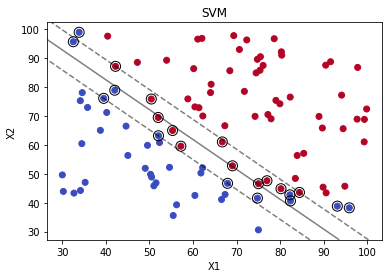

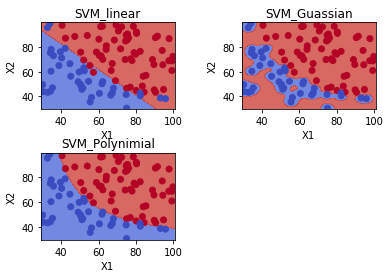

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
%matplotlib inline
data = pd.read_excel("ex2data1-logistic.xls")
x = data.iloc[:,0:2].values
y = data.iloc[:,2].values

#SVM
c=1.0   #Regularization Parameters
svc = svm.SVC(kernel='linear',C=c).fit(x,y)
svm_rbf = svm.SVC(kernel='rbf',gamma=0.1,C=c).fit(x,y)
svm_poly = svm.SVC(kernel='poly',degree=2,C=c).fit(x,y)

#Margin Line and Decision Boundry
#Plotting Data
plt.figure(1)
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.coolwarm)

ax=plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svc.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# plot support vectors
ax.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('SVM')

plt.figure(2)
h = .02  # step size in the mesh
# create a mesh to plot in
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
	                     np.arange(y_min, y_max, h))
title = ['SVM_linear', 'SVM_Guassian','SVM_Polynimial']
for i,svm in enumerate((svc,svm_rbf,svm_poly)):
    plt.subplot(2,2,i+1)
    plt.subplots_adjust(wspace=0.5,hspace=0.5)
    Z = svm.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx,yy,Z,cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(x[:,0],x[:,1],c=y,cmap = plt.cm.coolwarm)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    plt.title(title[i])
plt.show()

Obervations:
    Gamma parameter defines how far the influence of a single training example reaches, with low
values meaning ‘far’ and high values meaning ‘close’. S=100 in plot gives the radius of support of
vectors. For plotting decision boundary, I have used decision function of SVM to plot it with input
data. Another method is predict() of svm library.